<a href="https://colab.research.google.com/github/lcbjrrr/fiap-bdt-ml/blob/master/Abacates_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Utilizar base de dados sobre Abacates para descobrir se eles são converncionais ou organicos

In [0]:
pip install graphviz

In [0]:
# Importando bibliotacas necessárias

import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plot
from scipy.stats import norm
from sklearn.tree import  DecisionTreeClassifier
from sklearn.tree import export_graphviz
from graphviz import Source
from sklearn.neighbors import KNeighborsClassifier

Dados históricos sobre preços de abacate e volume de vendas em vários mercados dos EUA com base nas vendas reais no varejo dos abacates Hass.

O Dataset representa os dados semanais de varredura do varejo em 2018 para o volume de varejo nacional (unidades) e preço.

O preço médio dos abacates no dataset reflete um custo por unidade, mesmo quando várias unidades são vendidas em sacos. 

Colunas do dataset: 
- Date - Data de observação
- AveragePrice - Média de preço de uma unidade de abacate
- type - Convencional ou Organico
- year - Ano
- Region - Cidade/Região de observação
- Total Volume - Numero de abacates vendidos
- 4046 - Número total de abacates vendidos com o código PLU 4046
- 4225 - Número total de abacates vendidos com o código PLU 4225
- 4770 - Número total de abacates vendidos com o código PLU 4770

Dataset de https://www.kaggle.com/neuromusic/avocado-prices

In [0]:
avocado = pd.read_csv("/content/drive/My Drive/PROJ/dados/avocado.csv")

avocado

In [0]:
# Explorando os dados

# Quantidade de registros cada tipo (convencional, organico)
avocado['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

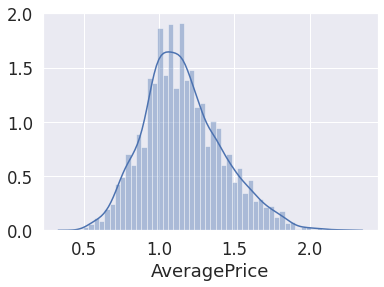

In [0]:
# Histograma da média de preco dos abacates convencionais
convencional = avocado.loc[avocado['type'] == 'conventional']
sns.distplot(convencional.AveragePrice)

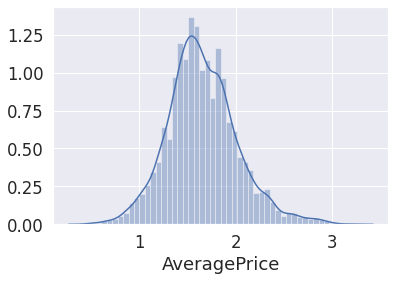

In [0]:
# Histograma da média de preco
organico = avocado.loc[avocado['type'] == 'organic']
sns.distplot(organico.AveragePrice)

Os histogramas dos dois tipo se parecem, porém do tipo organico possui mais outliers

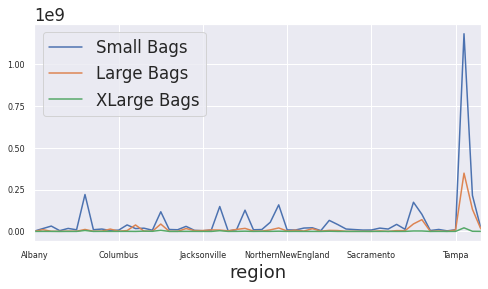

In [0]:
# Soma das bags para o tipo abacate convencional
bags = convencional[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(convencional.region).sum()
bags.plot(kind = 'line', fontsize = 8,figsize=(8,4))
plot.show()

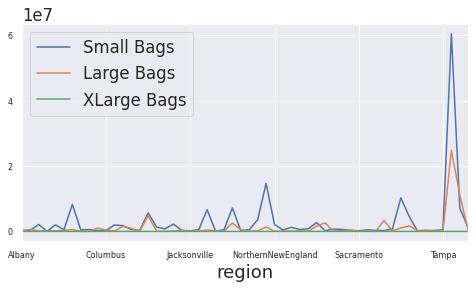

In [0]:
# Soma das bags para o tipo abacate organico
bags2 = organico[['Small Bags', 'Large Bags', 'XLarge Bags']].groupby(organico.region).sum()
bags2.plot(kind = 'line', fontsize = 8,figsize=(8,4))
plot.show()

A soma do valor das bags é bem maior para o convencional do que o organico


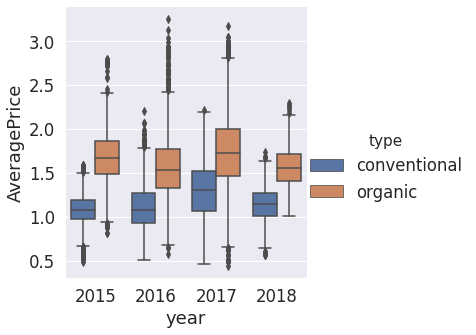

In [0]:
preco_ano = sns.catplot(x= "year", 
                        y= "AveragePrice", 
                        hue= "type", 
                        kind="box",
                        data =avocado)

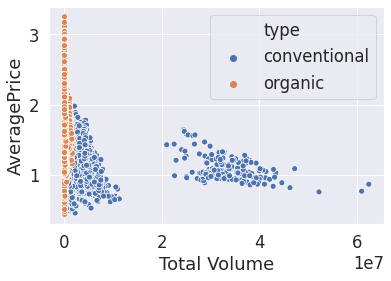

In [0]:
# Comparacao da distribuicao entre volume total e média de preco por tipo
sns.scatterplot(x='Total Volume', y = 'AveragePrice', hue= 'type', data= avocado)

O abacate do tipo organico apresenta pouco volume em comparacao ao convencional


In [0]:
# Divindo entre treino (70%) e teste (30%)
train, test = train_test_split(avocado, test_size=0.3)

col_type = test['type']

print('Treino:' + str(len(train)) + '/ Teste:' + str(len(test)))

Treino:12774/ Teste:5475


In [0]:
# Arvore de Decisao

# Os campo nao relevantes foram retirados para realizar o fit
# pois, sem eles, houve um aumento da acuracia

arv = DecisionTreeClassifier(max_depth=4)
arv.fit(train[['Total Volume', '4046', '4225', '4770', 
               'Small Bags','XLarge Bags']] 
        , train['type'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

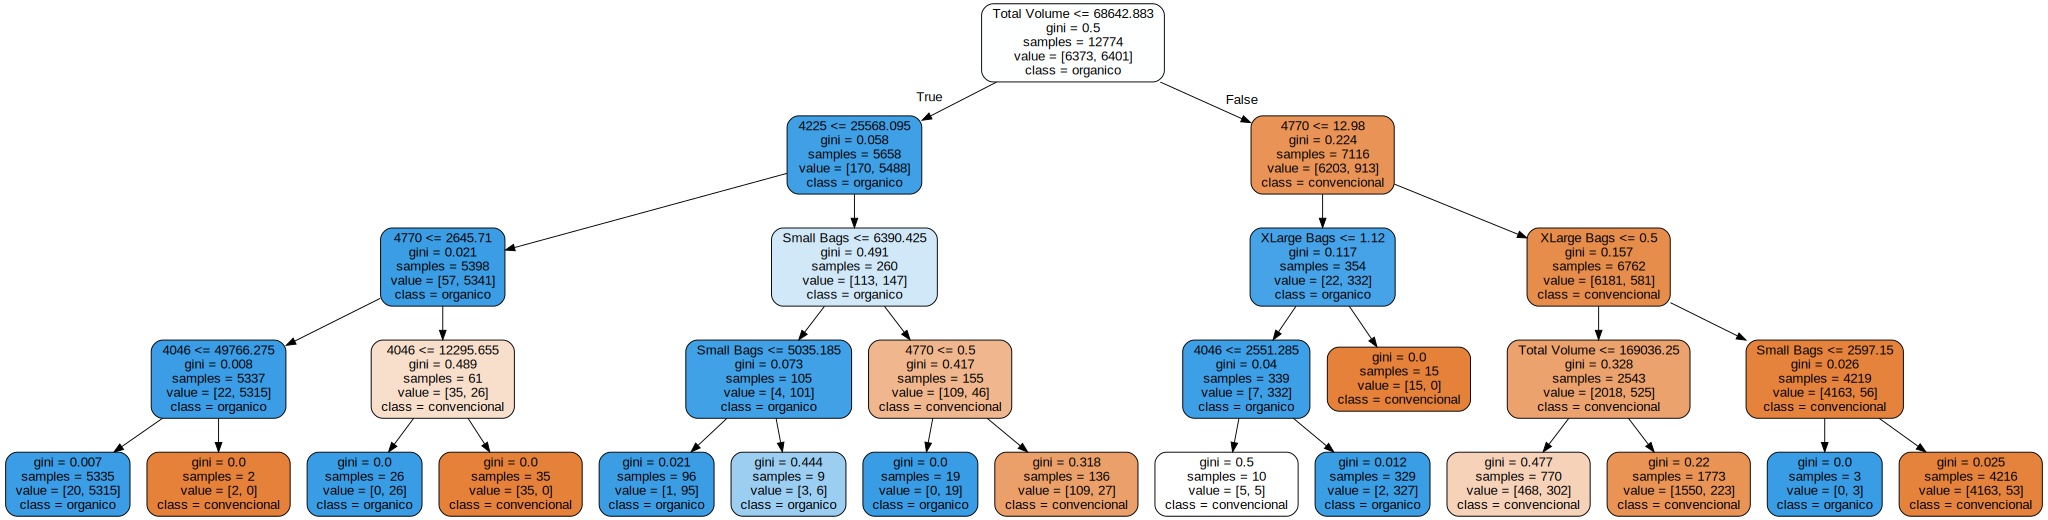

In [0]:
dot_data = export_graphviz(arv, out_file=None, filled=True, rounded=True,
                           feature_names=['Total Volume', '4046', '4225', '4770', 'Total Bags', 
                                          'Small Bags','Large Bags','XLarge Bags','year'],
                           class_names=['convencional','organico'])
Source(dot_data)

In [0]:
predic = arv.predict(test[['Total Volume', '4046', '4225', '4770', 
                           'Small Bags','XLarge Bags']])

predic

array(['organic', 'organic', 'conventional', ..., 'conventional',
       'organic', 'organic'], dtype=object)

In [0]:
print(classification_report(col_type,predic))

              precision    recall  f1-score   support

conventional       0.92      0.99      0.95      2753
     organic       0.99      0.91      0.95      2722

    accuracy                           0.95      5475
   macro avg       0.95      0.95      0.95      5475
weighted avg       0.95      0.95      0.95      5475



O modelo acertou 92% dos abacates convencionais e 99% dos abacates organicos

In [0]:
acuracia = sum(col_type == predic) / len(test)
acuracia

0.9514155251141553

O modelo possui 95% de acuracia


In [0]:
# KNN

# Nao foi necessario retirar nenhum campo para realizar o fit, 
# pois a acuracia é alta com todas as colunas

kviz = KNeighborsClassifier(n_neighbors=5)
kviz.fit(train[['Total Volume', '4046', '4225', '4770', 'Total Bags', 
                 'Small Bags','Large Bags','XLarge Bags','year']] , train['type'])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
predict = kviz.predict(test[['Total Volume', '4046', '4225', '4770', 'Total Bags', 
                              'Small Bags','Large Bags','XLarge Bags','year']])
predict

array(['organic', 'organic', 'conventional', ..., 'conventional',
       'organic', 'organic'], dtype=object)

In [0]:
print(classification_report(col_type,predict))

              precision    recall  f1-score   support

conventional       0.97      0.98      0.97      2753
     organic       0.98      0.97      0.97      2722

    accuracy                           0.97      5475
   macro avg       0.97      0.97      0.97      5475
weighted avg       0.97      0.97      0.97      5475



O modelo acertou 97% dos abacates convencionais e 98% dos abacates organicos


In [0]:
acuracia = sum(col_type == predict) / len(test)
acuracia

0.9733333333333334

O modelo possui 97% de acuracia

Entre os dois modelos, o que mais acertou foi o KNN